In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv("./resource/income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income')

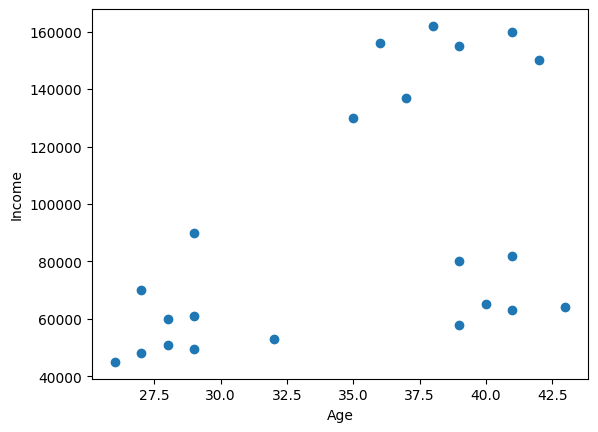

In [7]:
plt.scatter(df.Age, df['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")

In [10]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1],
      dtype=int32)

In [11]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [12]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04],
       [3.63333333e+01, 8.40000000e+04]])

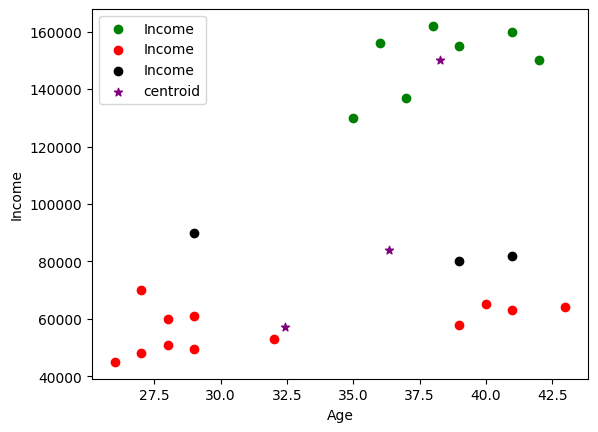

In [18]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age, df0['Income($)'], color='green',label='Income')
plt.scatter(df1.Age, df1['Income($)'], color='red',label='Income')
plt.scatter(df2.Age, df2['Income($)'], color='black',label='Income'
            )

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [19]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])

df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])

df['Age'] = scaler.transform(df[['Age']])


In [20]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


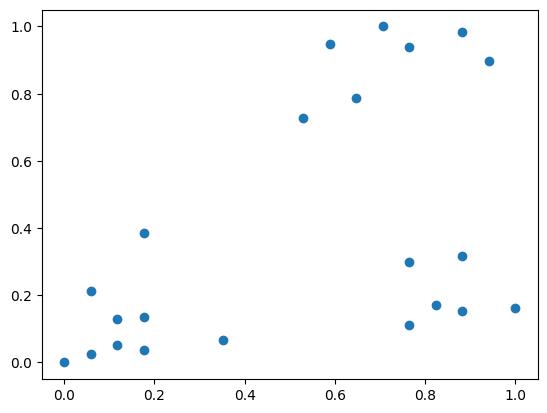

In [21]:
plt.scatter(df.Age, df['Income($)'])

In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [23]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [24]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

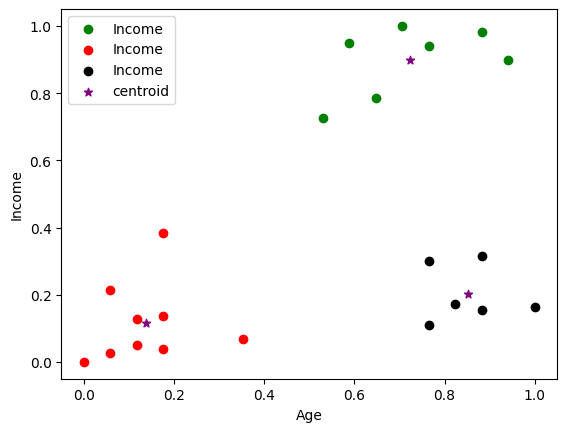

In [25]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0.Age, df0['Income($)'], color='green',label='Income')
plt.scatter(df1.Age, df1['Income($)'], color='red',label='Income')
plt.scatter(df2.Age, df2['Income($)'], color='black',label='Income'
            )

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='purple', marker='*',label='centroid')

plt.xlabel("Age")
plt.ylabel("Income")
plt.legend()

In [26]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

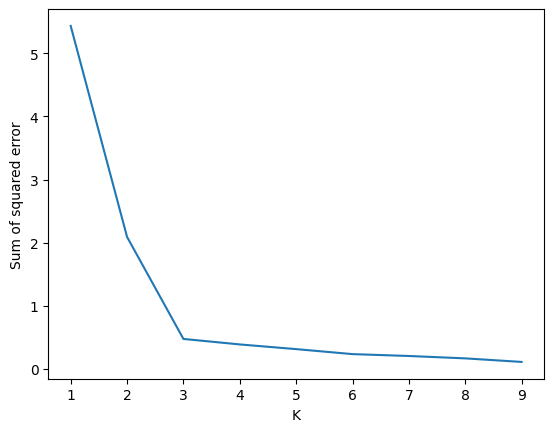

In [28]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse)